In [65]:
from hossam import load_data
from pandas import DataFrame
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb

#데이터 정상성 확인을 위한 ADF검정
from statsmodels.tsa.stattools import adfuller

#시계열 분해 패키지
from statsmodels.tsa.seasonal import seasonal_decompose

In [66]:
my_dpi = 200                                    # 이미지 선명도(100~300)
font_path = "./NotoSansKR-Regular.ttf"          # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)               # 폰트의 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname=font_path)  # 폰트의 속성을 읽어옴
font_name = font_prop.get_name()                # 읽어온 속성에서 폰트의 이름만 추출     
plt.rcParams['font.family'] = font_name         # 그래프에 한글 폰트 적용
plt.rcParams['font.size'] = 10                  # 기본 폰트크기
plt.rcParams['axes.unicode_minus'] = False      # 그래프에 마이너스 깨짐 방지(한글환경에서 필수)

In [67]:
origin = load_data('air_passengers')

print("\n===== 데이터 크기 확인 =====")
print(f"데이터셋 크기: {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")

print("\n===== 타입확인 =====")
print(origin.info())

origin.head()

[data] https://data.hossam.kr/data/lab13_/air_passengers.xlsx
[desc] 어느 항공사의 월간 탑승객 수 (출처: https://www.kaggle.com/datasets/rakannimer/air-passengers)
[!] Cannot read metadata

===== 데이터 크기 확인 =====
데이터셋 크기: (144, 2)
열 개수: 2
행 개수: 144

===== 타입확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB
None


,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


# 데이터 전처리
시계열 인덱스 설정

In [68]:
df1 = origin.set_index('Month')
df1.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


===== 0차 차분 =====


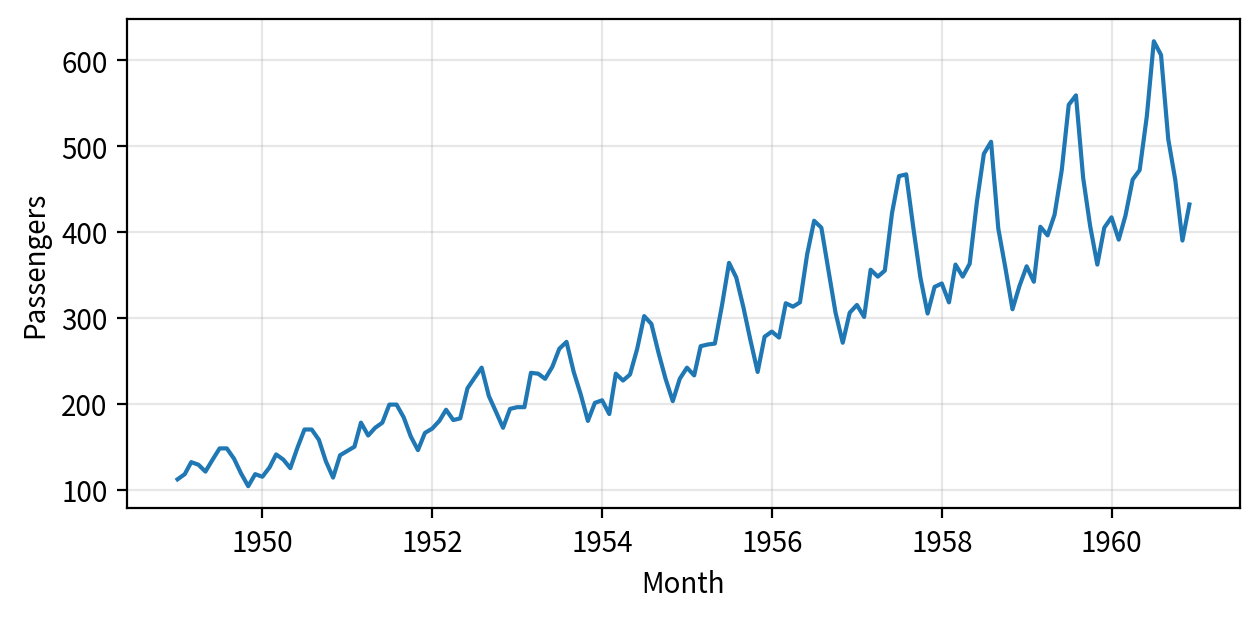

,0
ADF Statistic,0.815369
p-value,0.99188
num of lags,13
num of observations,130
result,False


===== 1차 차분 =====


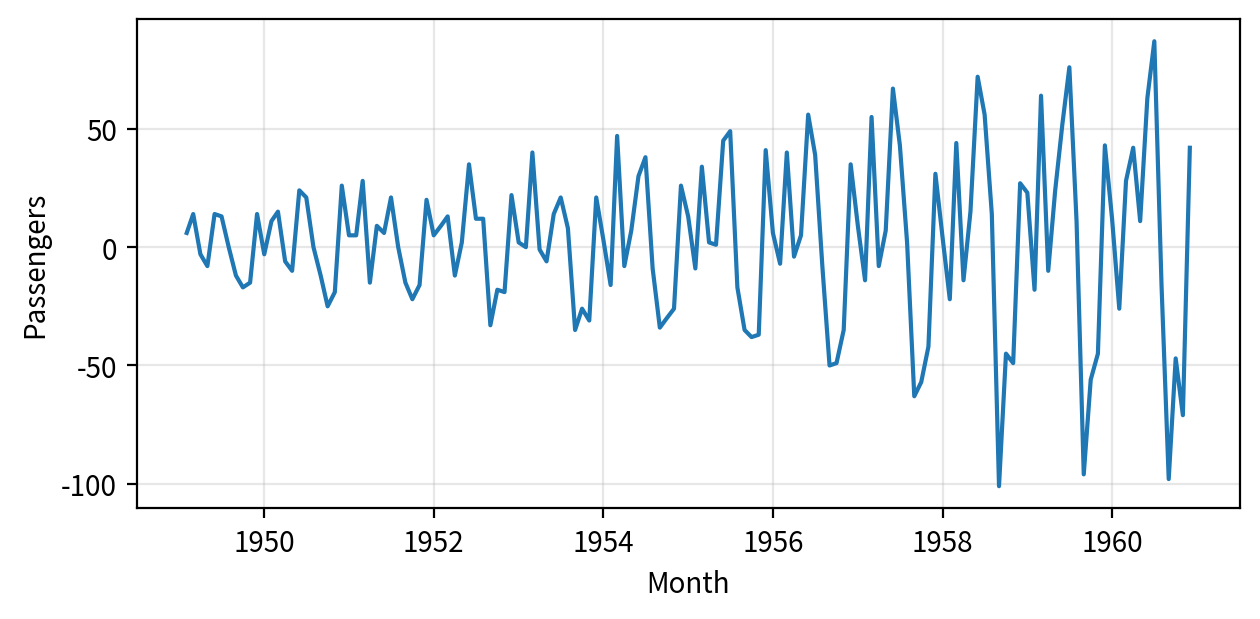

,0
ADF Statistic,-2.829267
p-value,0.054213
num of lags,12
num of observations,130
result,False


===== 2차 차분 =====


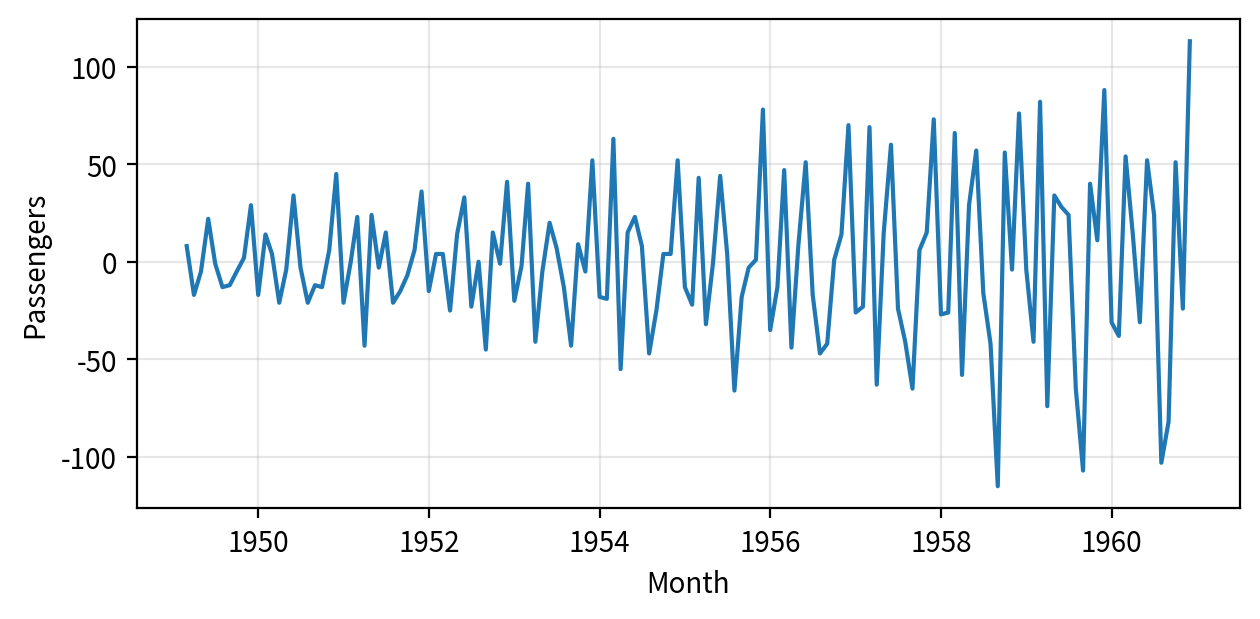

,0
ADF Statistic,-16.384232
p-value,0.0
num of lags,11
num of observations,130
result,True


In [69]:
diff_df = df1.copy()
yname = 'Passengers'
count = 0

while True:
    print(f"===== {count}차 차분 =====")
#시계열 그래프
    
    width_px = 1280
    height_px = 640
    rows = 1
    cols = 1
    figsize = (width_px/ my_dpi, height_px/ my_dpi)
    fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

    sb.lineplot(data=diff_df, x=diff_df.index, y=yname)


    ax.grid(True, alpha=0.3)


    plt.tight_layout()
    plt.show()
    plt.close()


    ar=adfuller(diff_df[yname])
    ar_dict = {
        'ADF Statistic': ar[0],
        'p-value':ar[1],
        'num of lags':ar[2],
        'num of observations':ar[3],
    }

    ar_dict['result'] = True if ar[1]<=0.05 else False

    adf = DataFrame([ar_dict]).T
    display(adf)

    #정상성 충족이라면 반복 중단
    if ar[1]<=0.05:
        break
    #정상성 충족되지 않았다면 차분 수행 후 다시 수행
    count +=1
    diff_df =diff_df.diff().dropna()

# 평균이동법

In [70]:
df2= df1.copy()
df2['rolling3'] = df2['Passengers'].rolling(3).mean()
df2['rolling6'] = df2['Passengers'].rolling(6).mean()
df2['rolling9'] = df2['Passengers'].rolling(9).mean()
df2.head(10)

,Passengers,rolling3,rolling6,rolling9
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,NaN
1949-03-01,132,120.666667,NaN,NaN
1949-04-01,129,126.333333,NaN,NaN
1949-05-01,121,127.333333,NaN,NaN
1949-06-01,135,128.333333,124.500000,NaN
1949-07-01,148,134.666667,130.500000,NaN
1949-08-01,148,143.666667,135.500000,NaN
1949-09-01,136,144.000000,136.166667,131.000000


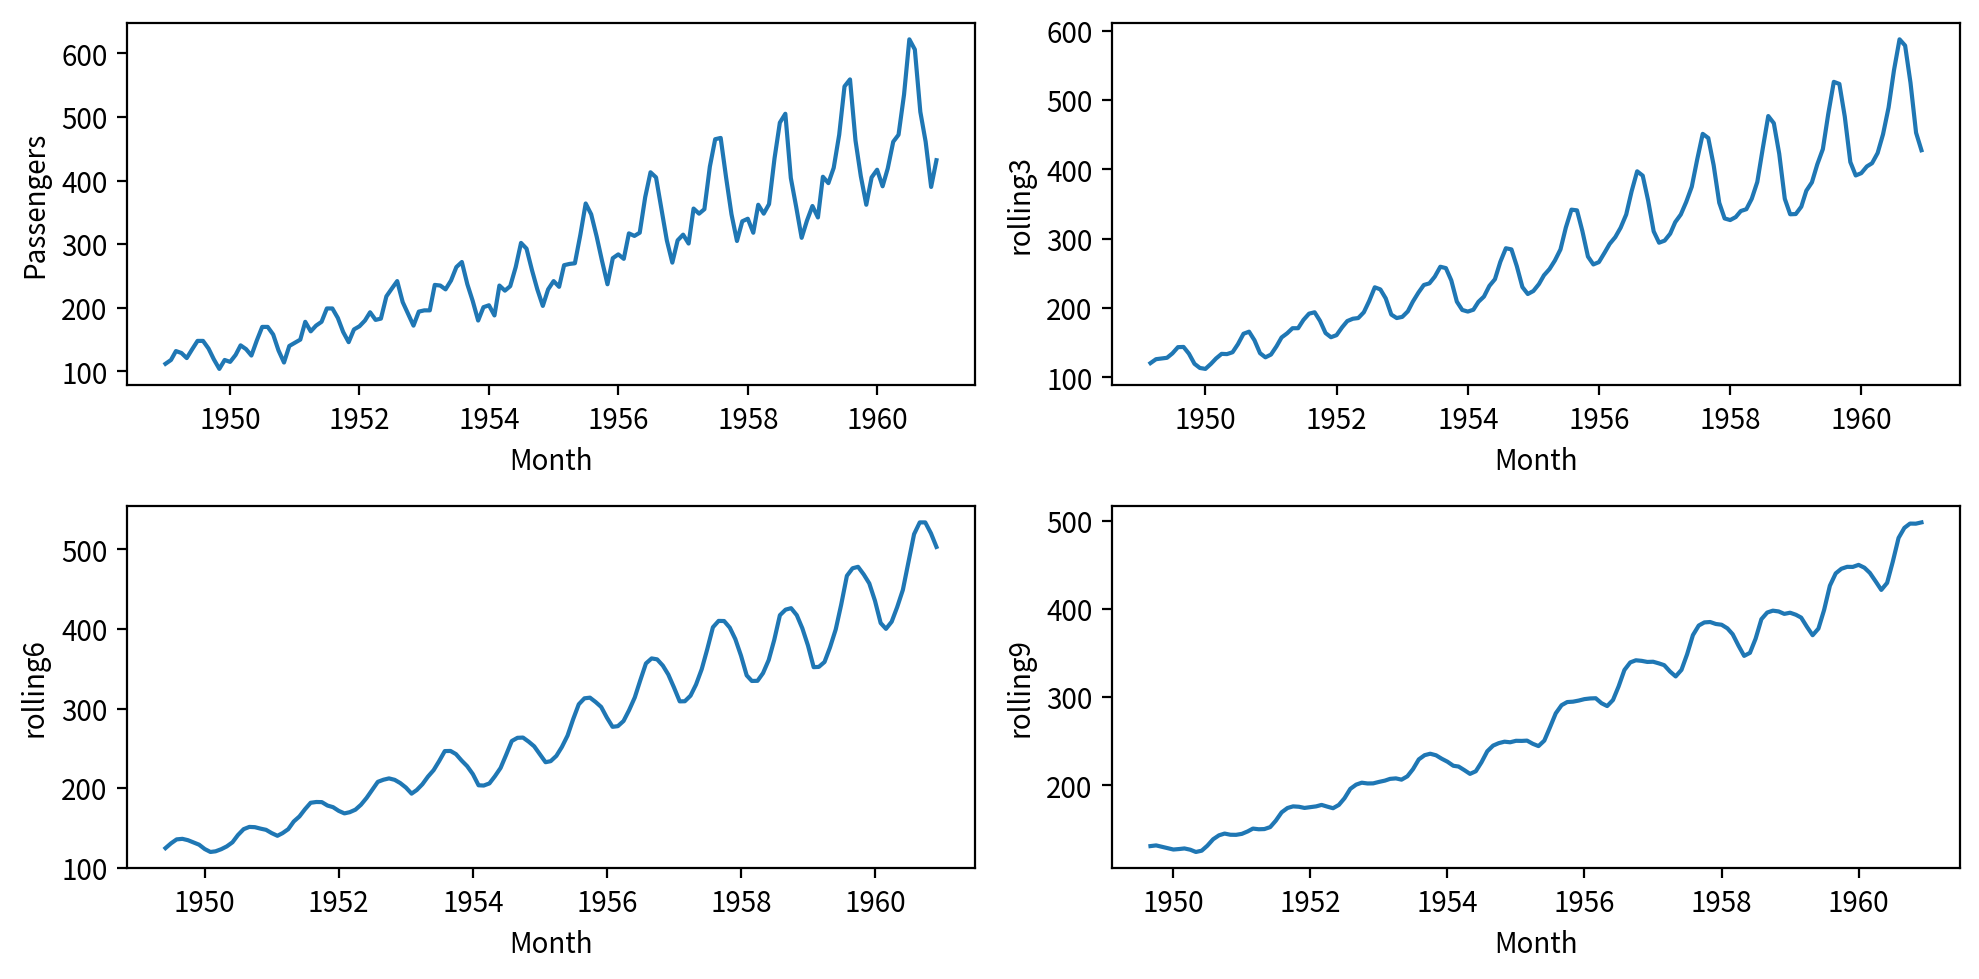

In [71]:
width_px = 2000
height_px = 1000
rows = 2
cols = 2
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

sb.lineplot(data=df2, x=df2.index, y='Passengers', ax=ax[0][0])
sb.lineplot(data=df2, x=df2.index, y='rolling3', ax=ax[0][1])
sb.lineplot(data=df2, x=df2.index, y='rolling6', ax=ax[1][0])
sb.lineplot(data=df2, x=df2.index, y='rolling9', ax=ax[1][1])


plt.tight_layout()
plt.show()
plt.close()

데이터의 평균을 이동하여 점점 더 그래프가 단순해 진다.
이를 통해 월별 승객 수가 꾸준히 증가하는 추세라는 것을 알 수 있다.

# 차분된 데이터 대한 3개월,6개월,9개월 평균

In [72]:
df3 = diff_df.copy()
df3['rolling3'] = df3['Passengers'].rolling(3).mean()
df3['rolling6'] = df3['Passengers'].rolling(6).mean()
df3['rolling9'] = df3['Passengers'].rolling(9).mean()

df3.head()

,Passengers,rolling3,rolling6,rolling9
Month,,,,
1949-03-01,8.0,NaN,NaN,NaN
1949-04-01,-17.0,NaN,NaN,NaN
1949-05-01,-5.0,-4.666667,NaN,NaN
1949-06-01,22.0,0.000000,NaN,NaN
1949-07-01,-1.0,5.333333,NaN,NaN


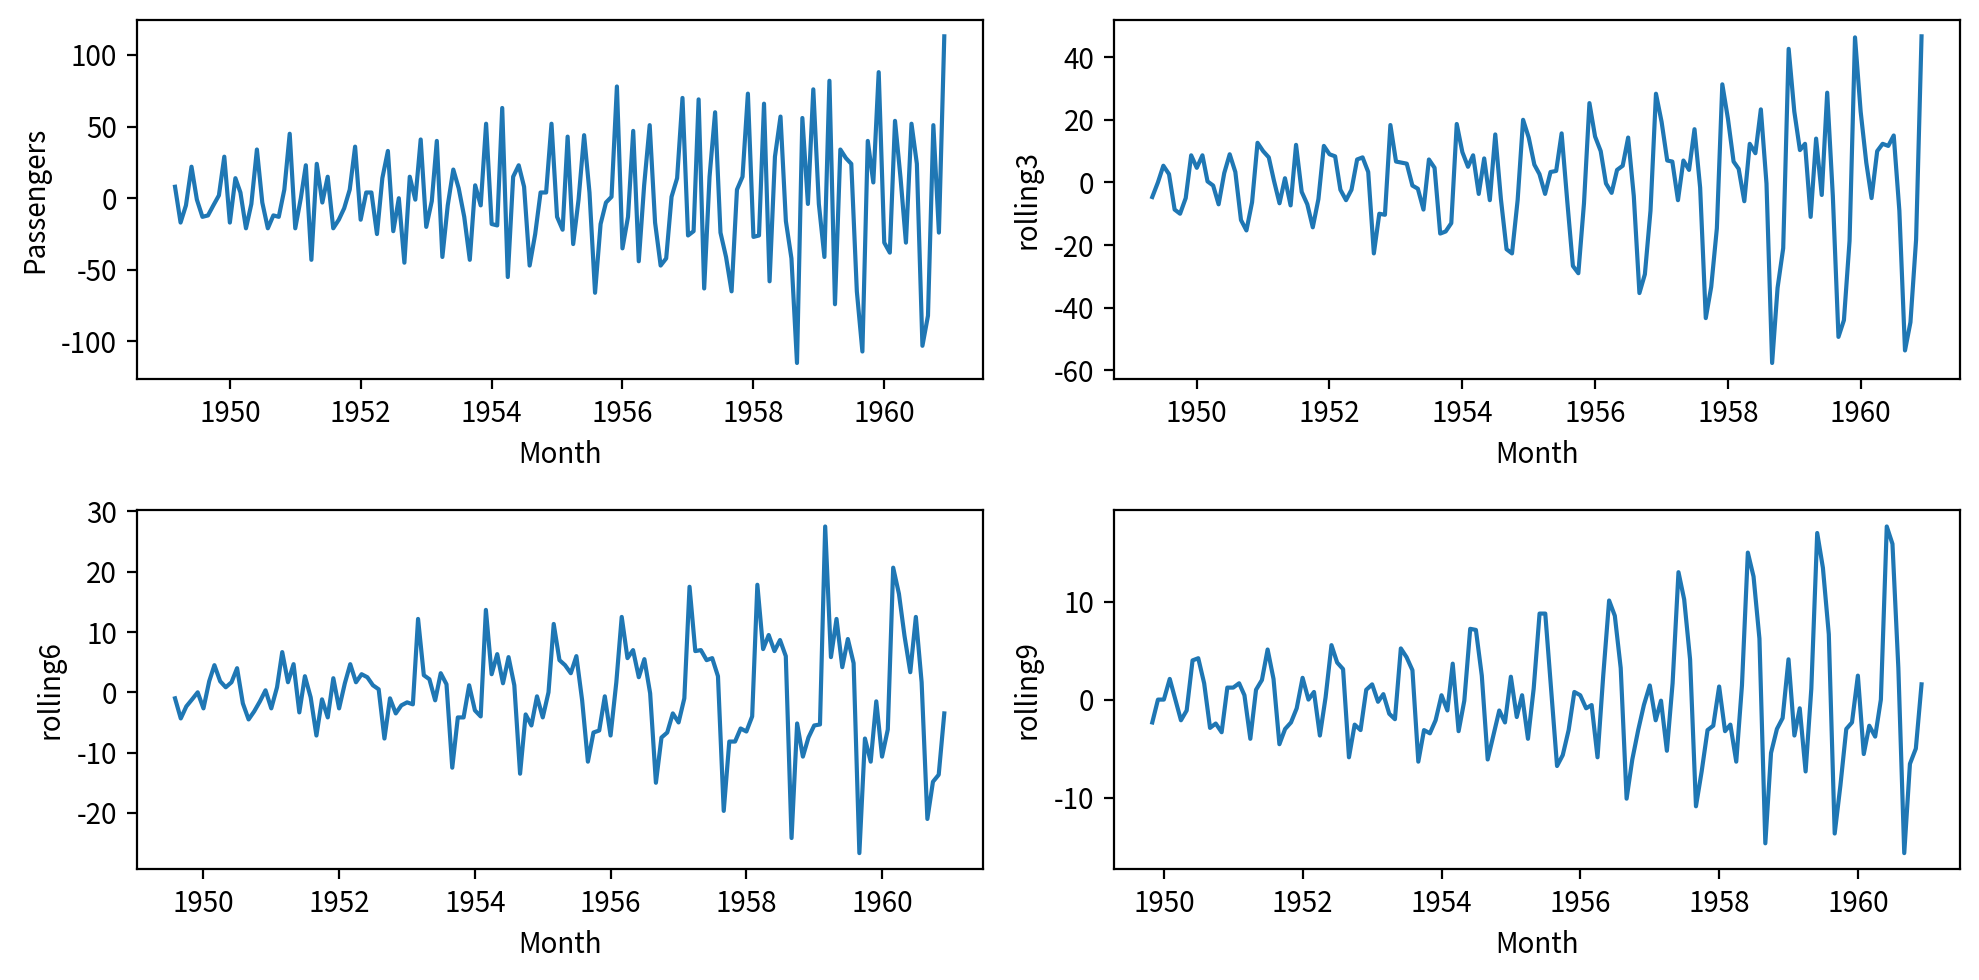

In [73]:
width_px = 2000
height_px = 1000
rows = 2
cols = 2
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

sb.lineplot(df3, x=df3.index, y='Passengers', ax=ax[0][0])
sb.lineplot(df3, x=df3.index, y='rolling3', ax=ax[0][1])
sb.lineplot(df3, x=df3.index, y='rolling6', ax=ax[1][0])
sb.lineplot(df3, x=df3.index, y='rolling9', ax=ax[1][1])


plt.tight_layout()
plt.show()
plt.close()

평균이동을 할 수록 그래프가 단순해 져서 6개월 주기로 증감을 반복하는 트렌드가 있음을 알 수 있다.
# 지수평활법

In [74]:
df4 =df1.copy()
df4['ewm3'] = df4['Passengers'].ewm(3).mean()
df4['ewm6'] = df4['Passengers'].ewm(6).mean()
df4['ewm9'] = df4['Passengers'].ewm(9).mean()

df4.head()

,Passengers,ewm3,ewm6,ewm9
Month,,,,
1949-01-01,112,112.000000,112.000000,112.000000
1949-02-01,118,115.428571,115.230769,115.157895
1949-03-01,132,122.594595,121.700787,121.372694
1949-04-01,129,124.937143,123.966516,123.590579
1949-05-01,121,123.646607,123.177832,122.957974


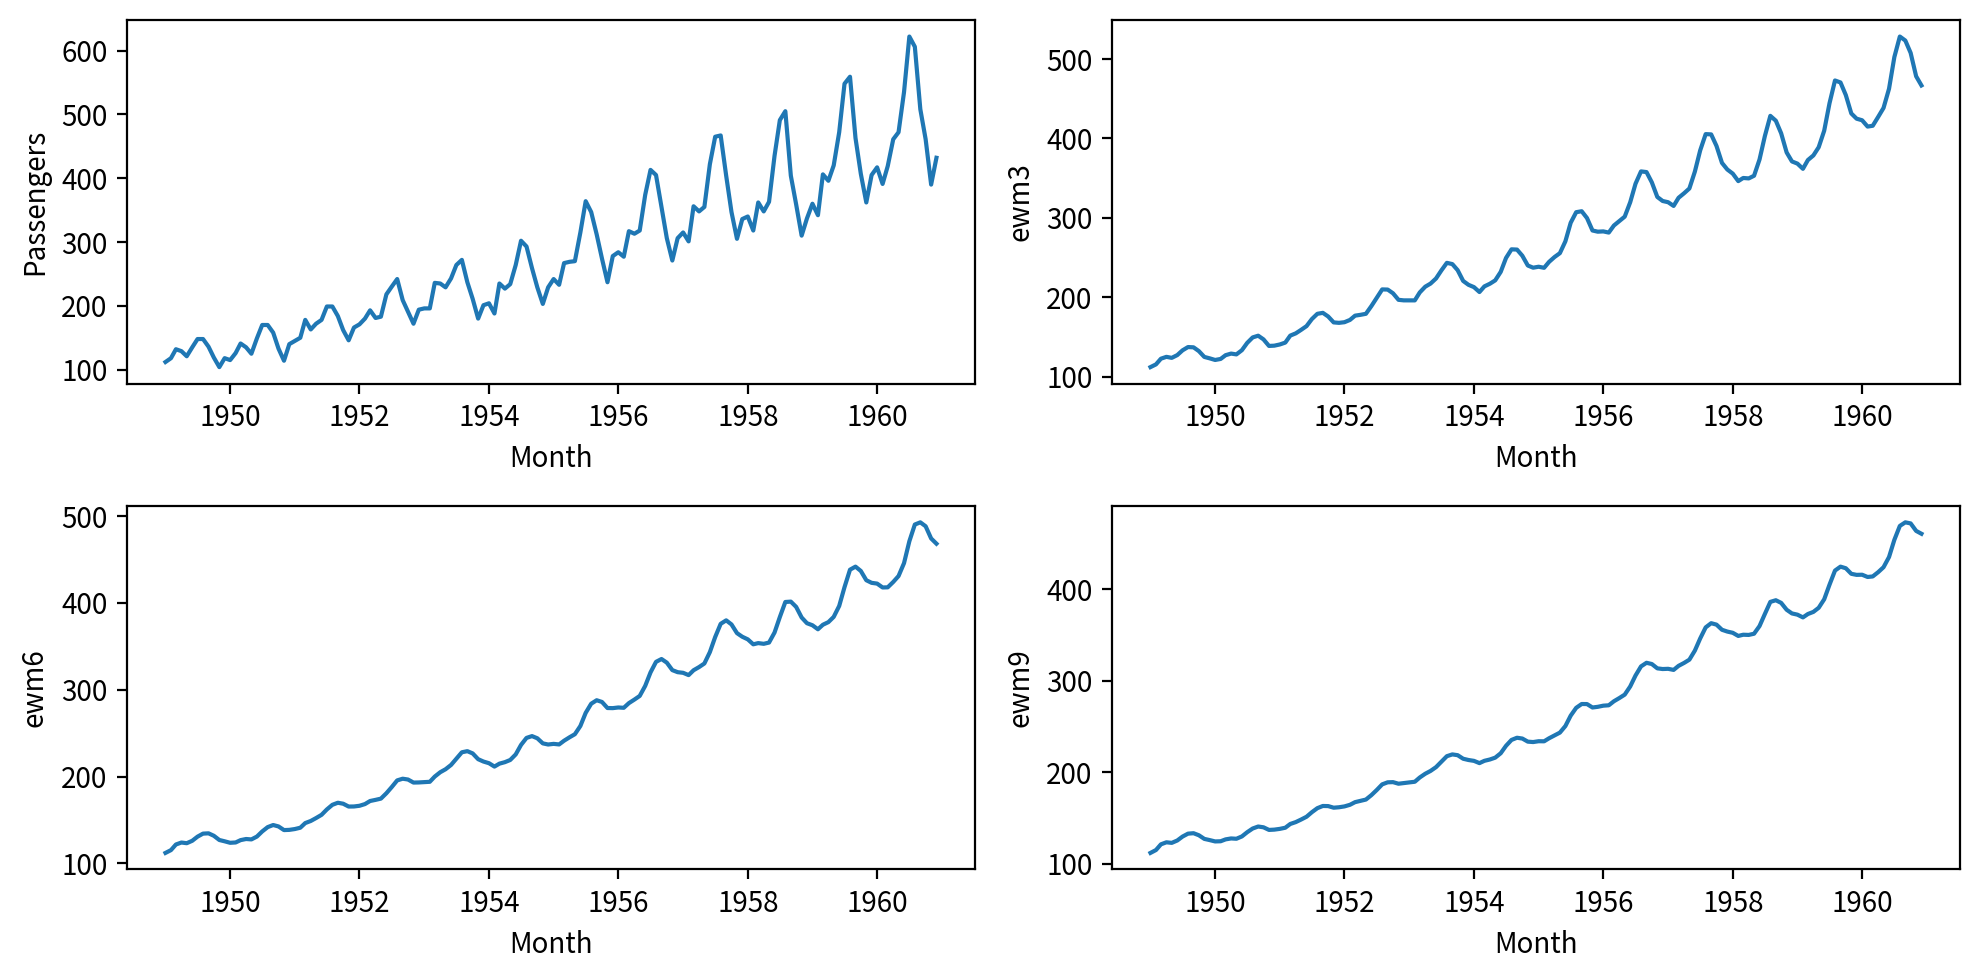

In [75]:
width_px = 2000
height_px = 1000
rows = 2
cols = 2
figsize = (width_px/ my_dpi, height_px/ my_dpi)

# ax 객체가 행, 열수에 따라서 리스트가 된다.
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

sb.lineplot(df4, x=df4.index, y='Passengers', ax=ax[0][0])
sb.lineplot(df4, x=df4.index, y='ewm3', ax=ax[0][1])
sb.lineplot(df4, x=df4.index, y='ewm6', ax=ax[1][0])
sb.lineplot(df4, x=df4.index, y='ewm9', ax=ax[1][1])


plt.tight_layout()
plt.show()
plt.close()

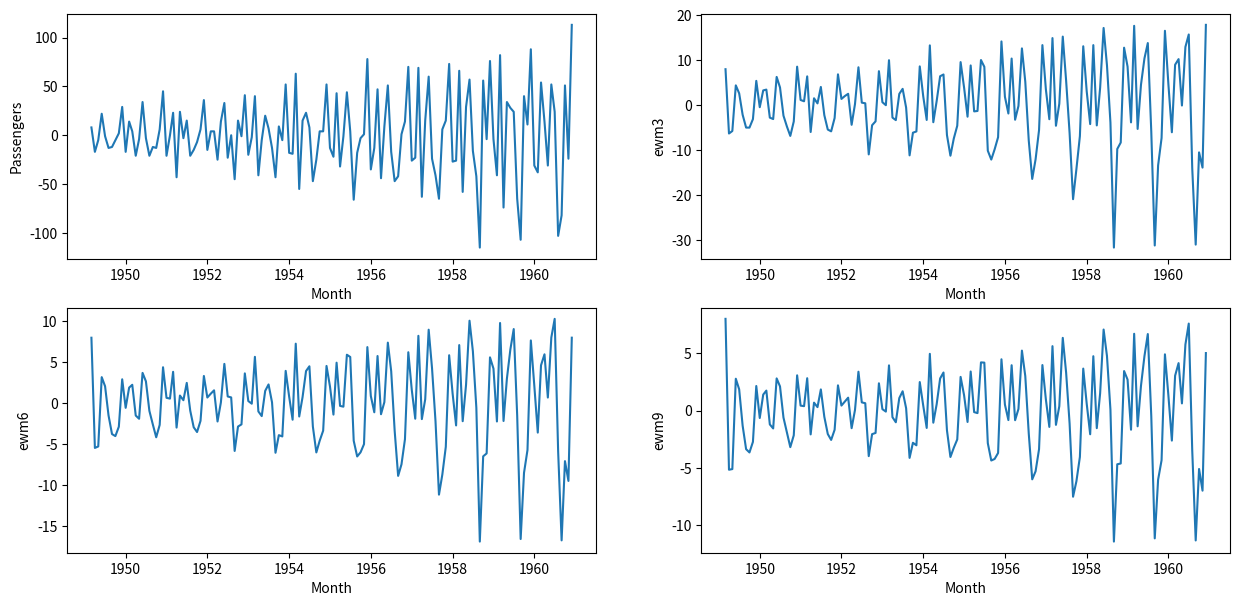

In [78]:
#차분 결과에 대한 지수평활법
diff_df['ewm3'] = diff_df['Passengers'].ewm(3).mean()
diff_df['ewm6'] = diff_df['Passengers'].ewm(6).mean()
diff_df['ewm9'] = diff_df['Passengers'].ewm(9).mean()

fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2, 2, figsize=(15,7))

sb.lineplot(diff_df, x=diff_df.index, y='Passengers', ax=ax1)
sb.lineplot(diff_df, x=diff_df.index, y='ewm3', ax=ax2)
sb.lineplot(diff_df, x=diff_df.index, y='ewm6', ax=ax3)
sb.lineplot(diff_df, x=diff_df.index, y='ewm9', ax=ax4)

plt.show()
plt.close()

# 분해시계열

In [80]:
#model_name = 'additive'        #기법 모델
model_name='multiplicative'     # 승법 모델

#분해 시계열 객체 생성
sd = seasonal_decompose(df1['Passengers'], model=model_name)

In [81]:
# trend, seasonal, residual 데이터 프레임으로 변환
sd_df = DataFrame({
    'original':sd.observed,
    'trend' : sd.trend,
    'seasonal':sd.seasonal,
    'resid':sd.resid
}, index = origin.index)

#이걸로는 알 수 없다.
sd_df

,original,trend,seasonal,resid
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
139,NaN,NaN,NaN,NaN
140,NaN,NaN,NaN,NaN
141,NaN,NaN,NaN,NaN
142,NaN,NaN,NaN,NaN


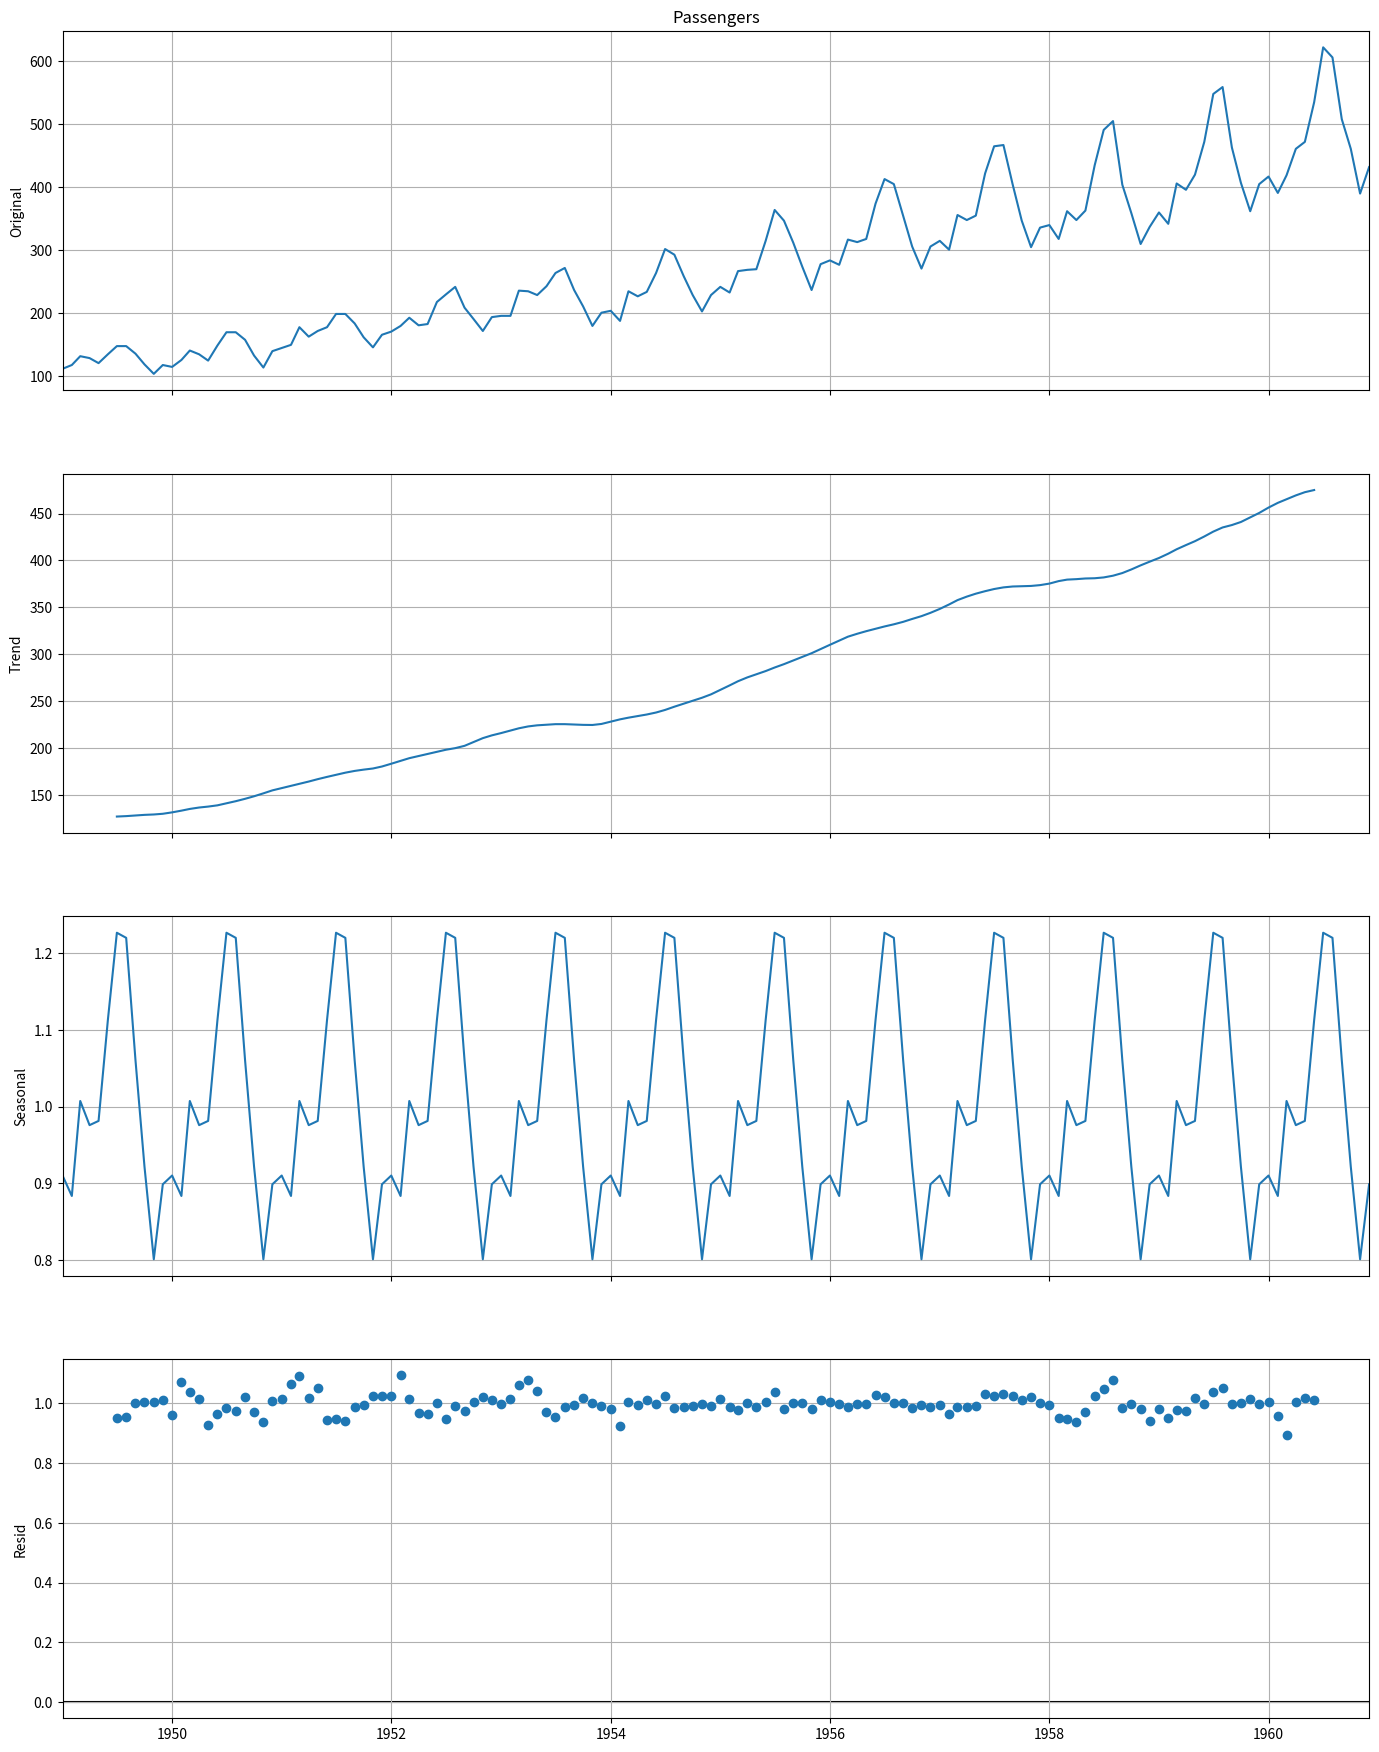

In [82]:
figure = sd.plot()
figure.set_size_inches((15,20))

fig, ax1, ax2, ax3, ax4 = figure.get_children()

ax1.set_ylabel("Original")
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)

plt.show()
plt.close()


원본데이터를 분해 했을 때 전반적으로 증가하는 추세(TREND)를 보이고 있으며, 1년 단위로 데이터 패턴이 반복되고 있다.
전체 평균을 1을 기준으로 크게 벗어나지 않는 잔차를 보이는 것으로 보아 분석 결과가 타당해 보인다.